<a href="https://colab.research.google.com/github/sunanda-debnath/EDA-PLAYSTORE-APP/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous study in this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

I gave to the chapters, what we are doing in this kernel is something like:

*   **loading the data into data frame**.
*   **Basic cleaning**. 
*   **Multivariate study**.
*   **Test assumptions**. We'll check if our data meets the assumptions required by most multivariate techniques.
*   **exploratory analysis and visualizations**
*   **questions that can be asked from the dataset**
*   **conclusion**




















# **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importing the dataset

In [3]:
df = pd.read_csv("/content/drive/MyDrive/ eda project 1/playstore original/Play Store Data.csv")
df_new = df.copy() #for not tampering the original data

# Data Overview

In [39]:
print(df_new.shape)
df_new.head()

(9637, 13)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


###All features are object data type except rating

# Checking what columns are there in the dataset

In [6]:
df_new.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

# Descriptive statistics

In [7]:
df_new.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [8]:
df_new['App'].duplicated().value_counts()

False    9660
True     1181
Name: App, dtype: int64

In [9]:
df_new.loc[df_new['App'].duplicated()] #no of duplicates

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12M,"1,000,000+",Free,0,Everyone,Shopping,"July 30, 2018",3.9,4.4 and up


### Droping the duplicates

In [10]:
df_new = df_new.drop_duplicates('App') 

In [11]:
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9660 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   object 
 4   Size            9660 non-null   object 
 5   Installs        9660 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9660 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9657 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


###Find null values

In [12]:
df_new.isna().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [13]:
#For minimize the lossing data we fill the null values in (Rating) column by mean through catagory wise.
df_new['Rating'].fillna(df_new.groupby('Category')['Rating'].transform('mean'),inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [14]:
df_new.isna().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       8
Android Ver       3
dtype: int64

###Dropping other null rows

In [15]:
df_new.dropna(inplace=True)

## correcting the data types
### Which all variables need to be brought to numeric types?
### Installs
### size
### Reviews
### Price

### Convert the 'Installs' column to int type

In [16]:
df_new['Installs'] = df_new['Installs'].apply(lambda x:x .replace('+',''))     #replacing '+' sign from each intalls values 
df_new['Installs'] = df_new['Installs'].apply(lambda x:x .replace(',',''))
df_new['Installs'] = df_new['Installs'].astype(int)


###Convert 'Size' column to float type and all values in Megabytes 

In [17]:
#replacing the string 'Varies with device' into NaN value and leter filled by mean value catagory wise
df_new['Size'].replace('Varies with device', np.nan, inplace = True)
df_new['Size'] =df_new['Size'].apply(lambda x:str(x).replace('M',''))
df_new['Size'] =df_new['Size'].apply(lambda x:str(x).replace('k','e-3')) #replace k(kilobytes) to megabytes
df_new['Size'] =df_new['Size'].astype(float) #convert to float
df_new['Size'].fillna(df_new.groupby('Category')['Size'].transform('mean'),inplace = True) #fill NaN values with mean of the size of the apps by its category respectively

In [18]:
df_new['Size'].unique() #unique values in 'Size' column

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 5.50000000e+00, 1.70000000e+01,
       3.90000000e+01, 3.10000000e+01, 4.20000000e+00, 7.00000000e+00,
       2.30000000e+01, 6.00000000e+00, 6.10000000e+00, 4.60000000e+00,
       9.20000000e+00, 5.20000000e+00, 1.10000000e+01, 2.40000000e+01,
       1.25295082e+01, 9.40000000e+00, 1.50000000e+01, 1.00000000e+01,
       1.20000000e+00, 2.60000000e+01, 8.00000000e+00, 7.90000000e+00,
       5.60000000e+01, 5.70000000e+01, 2.00371467e+01, 3.50000000e+01,
       5.40000000e+01, 2.01000000e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.70000000e+00,
       2.50000000e+00, 1.60000000e+01, 3.40000000e+00, 8.90000000e+00,
       3.90000000e+00, 2.90000000e+00, 3.80000000e+01, 3.20000000e+01,
      

###Convert Price column object to number type

In [19]:
df_new['Price']=df_new['Price'].apply(lambda x:x.replace('$',''))
df_new['Price']=df_new['Price'].astype(float)

convert Reviews column to numaric

In [20]:
df_new['Reviews'] =df_new['Reviews'].astype(int)

# Sanity cheak
##1.Avg rating should be between 1 and 5,only these values are allowed on the playstore.
###Are there any such records?drop if so

In [21]:
(df_new['Rating']<1).sum()

0

In [22]:
(df_new['Rating']>5).sum()

0

##2.Reviews should not be more than installs as only those who installed can review the app
###Are there any such records? Drop if so.

In [23]:
df_new[df_new['Reviews'] > df_new['Installs']]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.000000,4,25.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4550,RMEduS - 음성인식을 활용한 R 프로그래밍 실습 시스템,FAMILY,4.179664,4,64.000000,1,Free,0.00,Everyone,Education,"July 17, 2018",1.0.1,4.4 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.800000,10249,14.844916,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5812,AX Watch for WatchMaker,PERSONALIZATION,4.332215,2,0.238000,1,Paid,0.99,Everyone,Personalization,"August 18, 2017",1.0,2.3 and up
5917,Ra Ga Ba,GAME,5.000000,2,20.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6508,Sam.BN Pro,TOOLS,4.039554,11,2.000000,10,Paid,0.99,Everyone,Tools,"March 27, 2015",1.0.0,4.0.3 and up
6700,Brick Breaker BR,GAME,5.000000,7,19.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.000000,11,6.100000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.000000,20,4.200000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
9096,DZ Puzzle,FAMILY,4.179664,14,47.000000,10,Paid,0.99,Everyone,Puzzle,"April 22, 2017",1.2,2.3 and up


In [24]:
df_new.drop(df_new[df_new['Reviews']>df_new['Installs']].index,inplace=True) #droping 
df_new[df_new['Reviews'] > df_new['Installs']] #cheaking the output

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [25]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9637 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9637 non-null   object 
 1   Category        9637 non-null   object 
 2   Rating          9637 non-null   float64
 3   Reviews         9637 non-null   int64  
 4   Size            9637 non-null   float64
 5   Installs        9637 non-null   int64  
 6   Type            9637 non-null   object 
 7   Price           9637 non-null   float64
 8   Content Rating  9637 non-null   object 
 9   Genres          9637 non-null   object 
 10  Last Updated    9637 non-null   object 
 11  Current Ver     9637 non-null   object 
 12  Android Ver     9637 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 1.0+ MB


# Data Visulisation for Basic EDA
###1.App size

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


AttributeError: ignored

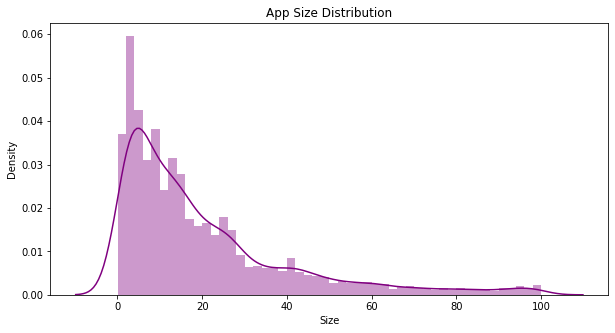

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df_new['Size'],color='purple')
plt.title('App Size Distribution')
plt.ylebel('Frequency')
plt.show()

In [33]:
#Most of the apps size lie in 0 to 20 mb range
(df_new[df_new['Size']<=20].shape[0]/df_new['Size'].shape[0])*100   # % of the apps size less or equal than to 20 mb

64.97872781986095

approx 65% of the apps come under 0 to 20 mb in in size 

###2.Relationship Analysis

In [35]:
df_new.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.055304,0.057262,0.040464,-0.019678
Reviews,0.055304,1.000000,0.075486,0.625151,-0.007607
Size,0.057262,0.075486,1.000000,0.040682,-0.021618
Installs,0.040464,0.625151,0.040682,1.000000,-0.009417
Price,-0.019678,-0.007607,-0.021618,-0.009417,1.000000


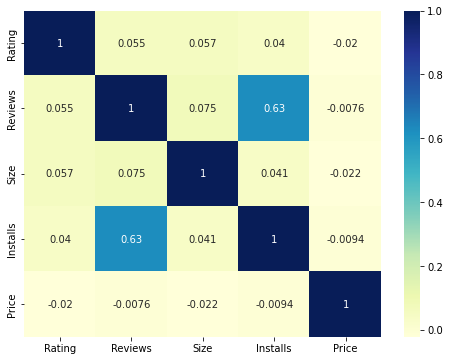

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(df_new.corr(),cmap="YlGnBu",annot=True)
plt.show()

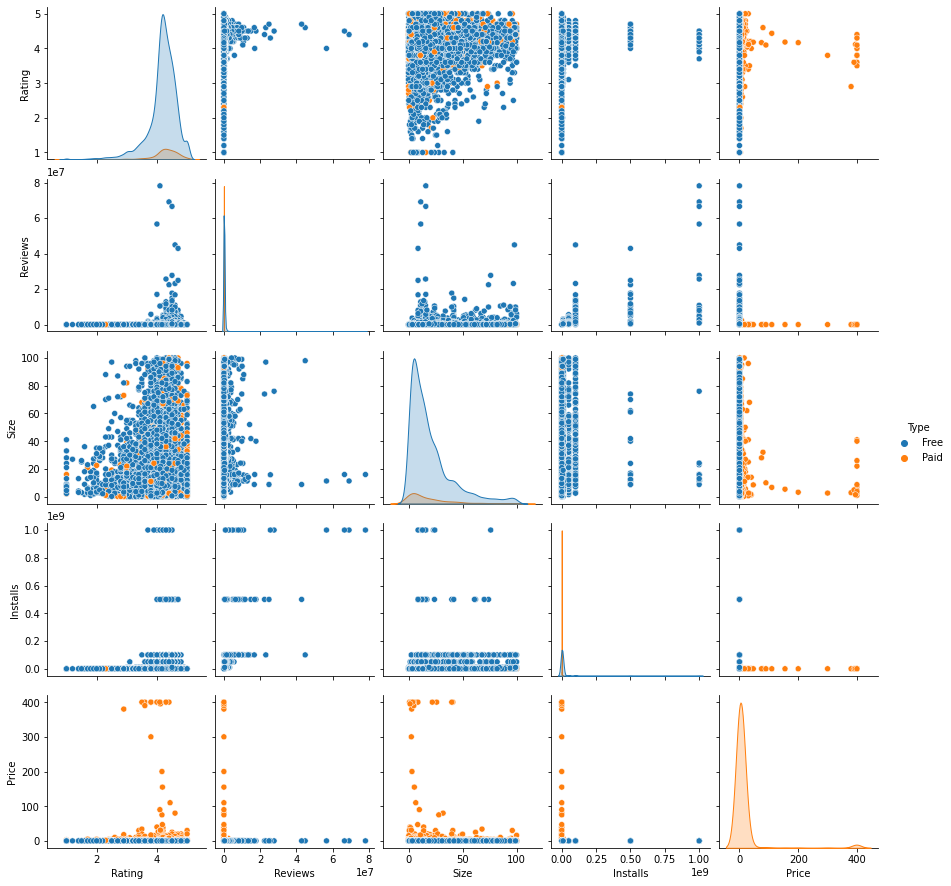

In [38]:
sns.pairplot(df_new,hue='Type')

###3.Corelations in Genres and Installs with types

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


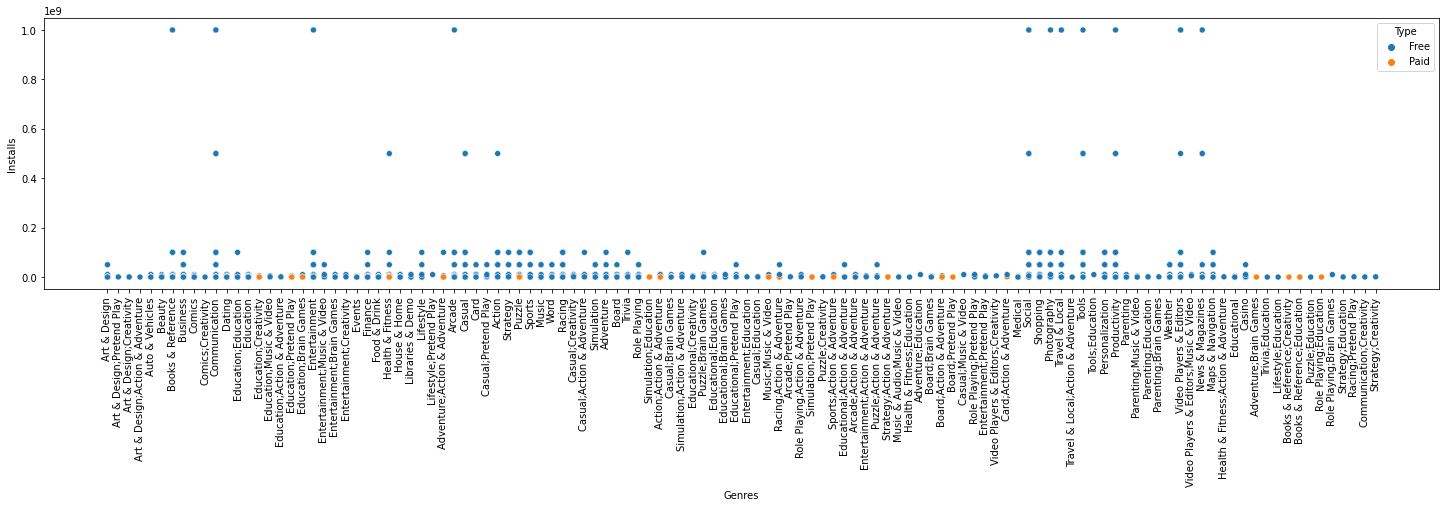

In [63]:
plt.figure(figsize=(25,5))
sns.scatterplot(df_new['Genres'], df_new['Installs'], hue=df_new['Type'])
plt.xticks(rotation=90)
plt.show()